# Read PDF to TXT

Author lds217


# PDF to PNG

In [67]:
from pdf2image import convert_from_path

images = convert_from_path('data/a.pdf', poppler_path = r"D:\Dat\Github\OCR\bin\poppler-24.07.0\Library\bin")

for i in range(len(images)):
    images[i].save('data/converted/page'+ str(i) +'.jpg', 'JPEG')

# Clean PNG

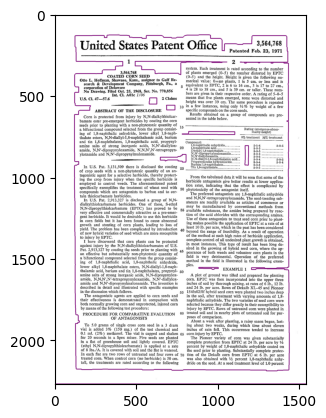

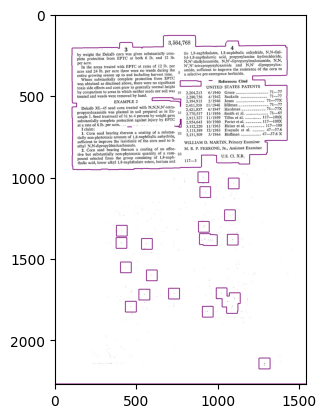

In [7]:
# Color drawings are acceptable in US patent applications, but not in international applications (see PCT Rule 11.13).
# https://github.com/pankajr141/experiments/blob/master/Reasoning/ComputerVision/opencv%20tricks%20-%20segmenting%20pdf%20contents.ipynb
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
a = 0
folder_path = 'data/converted'
for index, filename in enumerate(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)

    img_ = 255 - img      # Reversing scales of RGB image
    img_[img_ < 128] = 0   # Removing pixel with low brightness


    # Remove Lines from our image
    kernel = np.ones((2, 2), np.uint8)
    img_erosion = cv2.erode(img_, kernel, iterations=1)

    # grouping Elements which are near
    kernel = np.ones((9, 9), np.uint8)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=8)

    gray = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(img, contours, -1, (127, 12, 123), 3)
    cv2.imwrite('data/convertedprocess/page'+ str(a) +'.jpg', img)
    a+=1
    plt.figure()
    plt.imshow(img)


plt.show()

# Read text with tesseract

In [8]:
import os
from PIL import Image
import pytesseract

all_text = ""
folder_path = 'data/convertedprocess'
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    text = pytesseract.image_to_string(Image.open(image_path))
    all_text += f"Text from {filename}:\n{text}\n\n"

output_file = 'output_tesseract_without_pre.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(all_text)

# same result withou pre-processing


# Chat GPT

In [10]:
with open("output_tesseract.txt", "r", encoding='utf-8-sig') as f:
    string = f.read()
string

'Text from page0.jpg:\nUnited States Patent Office\n\n3,564,768\nPatented Feb. 23, 1971\n\ni\n\n3,564,768\nCOATED CORN SEED\nOtto L. Hoffman, Shawnee, Kans,, assignor to Gulf Re-\nsearch & Development Company, Pittsburgh, Pa., a\ncorporation of Delaware 5\nNo Drawing. Filed Oct. 25, 1968, Ser. No. 770,856\nInt. Cl. AOke 1/06 .\nUS. Cl. 47—57.6 2 Claims\n\n10\nABSTRACT OF THE DISCLOSURE\n\nCorn is protected from injury by N,N-dialkylthiolcar-\nbamate ester pre-emergent herbicides by coating the corn\nseeds prior to planting with a non-phytotoxic quantity of\na bifunctional compound selected from the group consist-\ning of 1,8-naphthalic anhydride, lower alkyl 1,8-naph-\nthalate esters, N,N-diallyl-1,8-naphthalamic acid, barium\nand tin 1,8-naphthalates, 1,8-naphthalic acid, propynyl-\namine salts of strong inorganic acids, N,N’-diallylox-\namide, N,N’-dipropynyloxamide, N,N,N’,N’-tetrapropyn-\nyloxamide and N,N’-dipropynylmalonamide.\n\n16\n\n20\n\nIn U.S. Pat. 3,131,509 there is disclo

In [11]:
from openai import OpenAI
import os

key = os.getenv("OPEN_AI_KEY")
client = OpenAI(
    api_key=key,
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": "can you help my summarize this document in technical term?" + prompt}]
    )
    return response.choices[0].message.content.strip()

print(chat_gpt(string))

The document describes a method for protecting corn plants from injury caused by N,N-dialkylthiolcarbamate ester pre-emergent herbicides by coating the corn seeds with a non-phytotoxic quantity of specific bifunctional compounds. The effectiveness of these compounds is demonstrated through a comparative evaluation test procedure. The preferred antagonists are 1,8-naphthalic anhydride and N,N,N’-tetrapropynyloxamide. Application of these compounds on corn seeds prior to planting allows for the safe use of EPTC herbicide at high rates, resulting in improved crop protection and yield. Examples are provided to illustrate the successful application of the method in the field. The document also includes patent information and references to relevant patents.


In [1]:
import deepdoctection as dd
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import pandas as pd

[1001 02:25.13 @env_info.py:449]  WRN  Both DD_USE_TORCH and DD_USE_TF are set. Defaulting to PyTorch. If you want a different behaviour, set DD_USE_TORCH to None before importing deepdoctection.
[1001 02:25.14 @file_utils.py:31]  INF  PyTorch version 2.4.1 available.
[1001 02:25.14 @file_utils.py:69]  INF  Disabling Tensorflow because USE_TORCH is set
c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[1001 02:21.22 @dd.py:464]  INF  Config: 
 {'DEVICE': 'cuda',
 'LANGUAGE': 'eng',
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PDF_MINER': {'X_TOLERANCE': 3, 'Y_TOLERANCE': 3},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 '

348.0 604.0 2270.0 1458.0


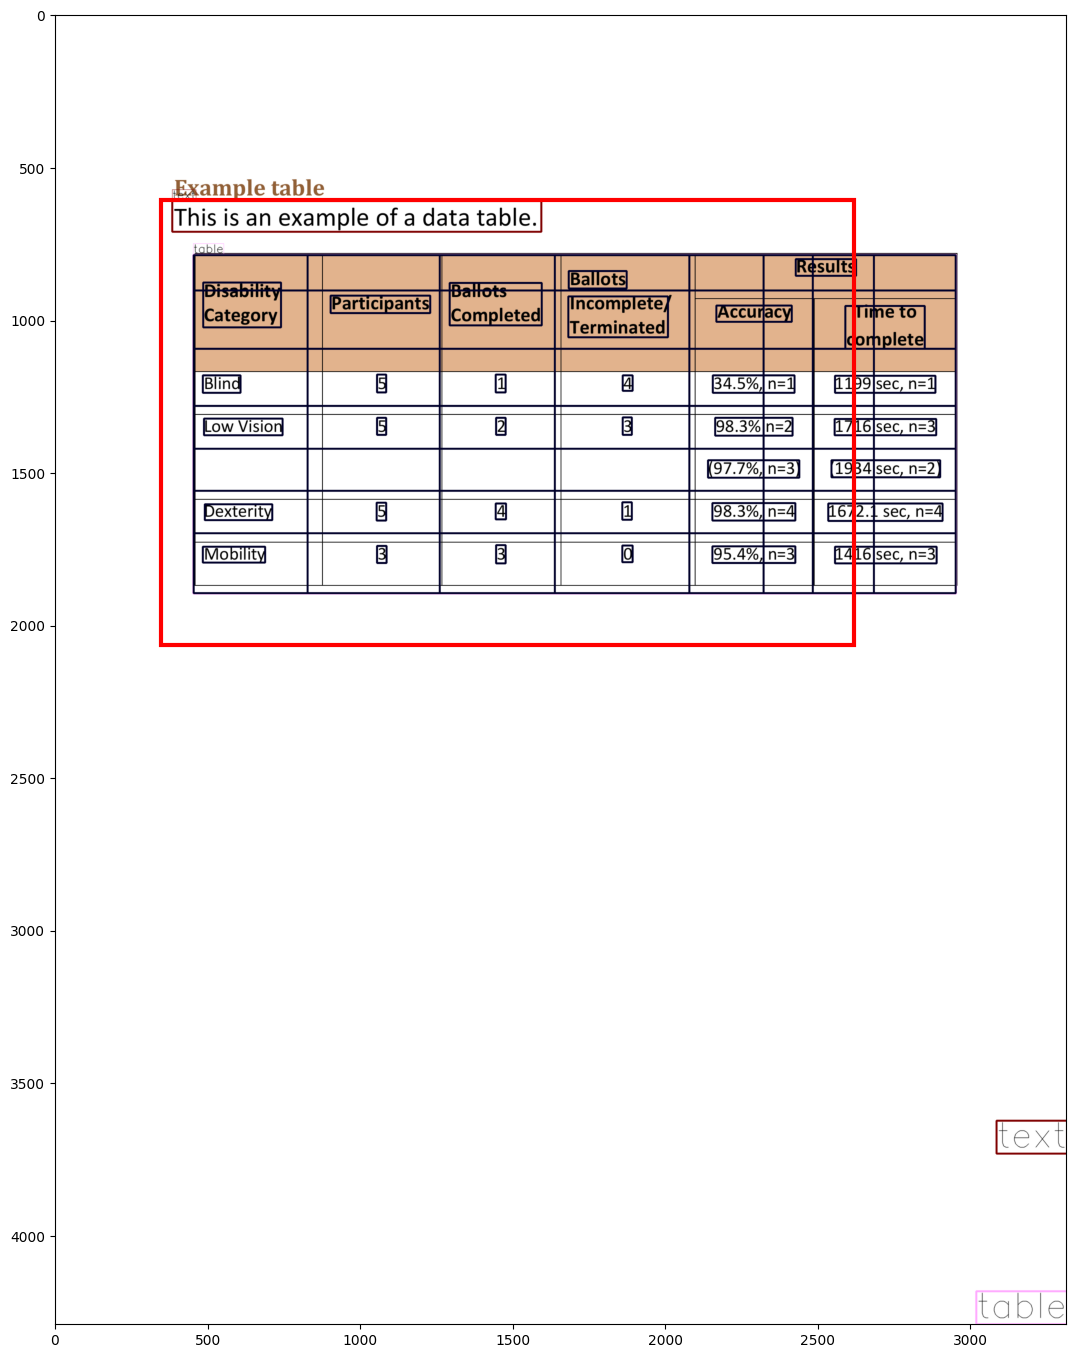

             0  1  2  3              4  5                 6
0                                                          
1                                                          
2       Blind              34.5%, n=1        1199 sec, n=1 
3  Low Vision               98.3% n=2        1716 sec, n=3 
4                        (97.7%, n=3)      (1934 sec, n=2) 
5   Dexterity              98.3%, n=4      1672.1 sec, n=4 
6    Mobility              95.4%, n=3        1416 sec, n=3 


In [40]:
path = "data/table.pdf"
config_overwrite = [
    "LANGUAGE='eng'",
    "DEVICE='cuda'", 
    "USE_LAYOUT=True",  
    "USE_TABLE_SEGMENTATION=True",  
    "USE_TABLE_REFINEMENT=True", 
]
analyzer = dd.get_dd_analyzer(config_overwrite=config_overwrite)
df = analyzer.analyze(path=path)
df.reset_state()


doc = iter(df)
page = None

for _ in range(1):
    page = next(doc)


if page and len(page.tables) > 0:
    image = page.viz()  

    plt.figure(figsize=(25, 17))
    plt.axis('on')

    plt.imshow(image)

    for table in page.tables:
        bbox = table.bbox

        x0, y0, x1, y1 = bbox
        print( x0, y0, x1, y1)
        plt.gca().add_patch(
            plt.Rectangle((x0, y0), x1, y1, fill=False, edgecolor='red', linewidth=3)
        )

    plt.show()

    for table in page.tables:
        df_table = pd.DataFrame(table.csv)
        print(df_table.head(10))
else:
    print("No tables detected on this page.")

In [5]:
dd.ModelCatalog.register("layoutparser/publaynet/model_final.pth",dd.ModelProfile(
            name="layoutparser/publaynet/model_final.pth",
            description="Add some infos regarding the model",
            config="layoutparser/publaynet/config.yml",
            tp_model=False,
            size = [],
            categories={
                1: dd.LayoutType.TEXT,
                2: dd.LayoutType.TITLE,
                3: dd.LayoutType.LIST,
                4: dd.LayoutType.TABLE,
                5: dd.LayoutType.FIGURE,
            },
            model_wrapper="D2FrcnnDetector",
        ))

KeyError: 'Model already registered'

[1001 02:34.59 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from C:\Users\Owner\.cache\deepdoctection\weights\layoutparser/publaynet/model_final.pth ...
[1001 02:34.59 @checkpoint.py:150]  INF  [Checkpointer] Loading from c:\Users\Owner\.cache\deepdoctection\weights\layoutparser/publaynet/model_final.pth ...
c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via th

NameError: name 'page' is not defined

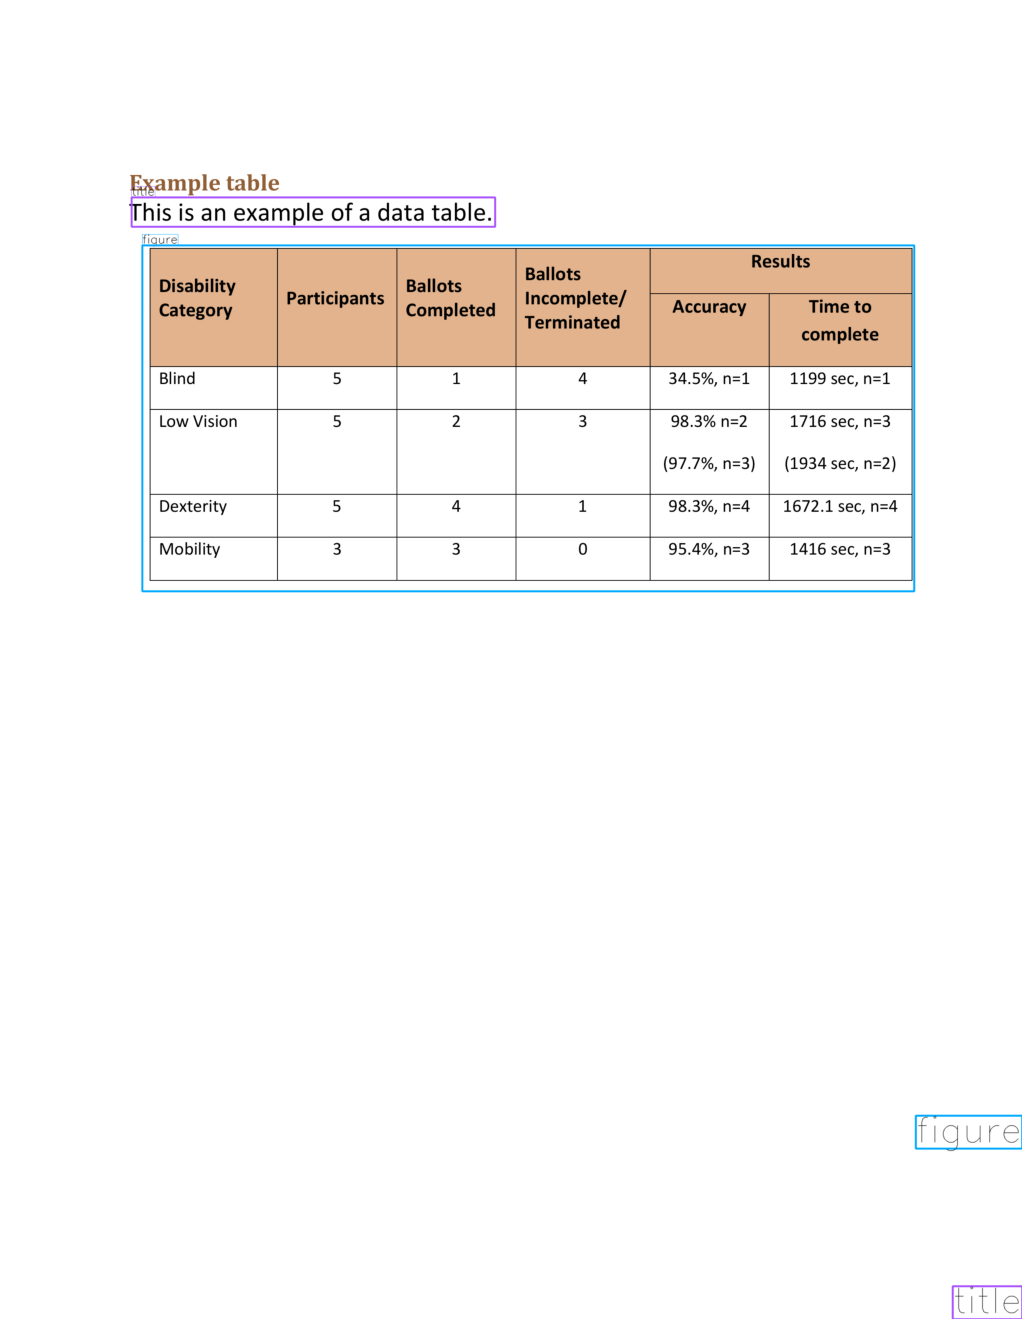

In [10]:
path_weights = dd.ModelCatalog.get_full_path_weights("layoutparser/publaynet/model_final.pth")
path_config = dd.ModelCatalog.get_full_path_configs("layoutparser/publaynet/model_final.pth")
categories = dd.ModelCatalog.get_profile("layoutparser/publaynet/model_final.pth").categories

d2_detector = dd.D2FrcnnDetector(path_config,path_weights,categories)
image_layout = dd.ImageLayoutService(d2_detector)

pipe = dd.DoctectionPipe([image_layout])

path = "data/table.pdf"
df = pipe.analyze(path="data/table.pdf")
df.reset_state()

df_iter = iter(df)
dp = next(df_iter)

image = dp.viz()

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)


In [12]:
@dd.object_types_registry.register("NewspaperType")
class NewspaperExtension(dd.ObjectTypes):
    """Additional Newspaper labels not registered yet"""

    PHOTOGRAPH ="Photograph",
    ILLUSTRATION = "Illustration",
    MAP = "Map",
    COMIC = "Comics/Cartoon",
    EDITORIAL_CARTOON = "Editorial Cartoon",
    HEADLINE = "Headline",
    ADVERTISEMENT =  "Advertisement"
from deepdoctection.datapoint.view import IMAGE_ANNOTATION_TO_LAYOUTS, Layout

IMAGE_ANNOTATION_TO_LAYOUTS.update({i: Layout for i in NewspaperExtension})

In [13]:
from deepdoctection.datapoint.view import IMAGE_ANNOTATION_TO_LAYOUTS, Layout

IMAGE_ANNOTATION_TO_LAYOUTS.update({i: Layout for i in NewspaperExtension})

In [14]:
dd.ModelCatalog.register("layoutparser/newspaper/model_final.pth",dd.ModelProfile(
            name="layoutparser/newspaper/model_final.pth",
            description="layout detection ",
            config="layoutparser/newspaper/config.yml",
            size=[],
            tp_model=False,
            categories={1: NewspaperExtension.PHOTOGRAPH,
                        2: NewspaperExtension.ILLUSTRATION,
                        3: NewspaperExtension.MAP,
                        4: NewspaperExtension.COMIC,
                        5: NewspaperExtension.EDITORIAL_CARTOON,
                        6: NewspaperExtension.HEADLINE,
                        7: NewspaperExtension.ADVERTISEMENT},
            model_wrapper="D2FrcnnDetector",
        ))

In [16]:
path_weights = dd.ModelCatalog.get_full_path_weights("layoutparser/newspaper/model_final.pth")
path_config = dd.ModelCatalog.get_full_path_configs("layoutparser/newspaper/model_final.pth")
categories = dd.ModelCatalog.get_profile("layoutparser/newspaper/model_final.pth").categories

d2_detector = dd.D2FrcnnDetector(path_config,path_weights,categories,config_overwrite=["NMS_THRESH_CLASS_AGNOSTIC=0.8","MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.1"])
image_layout = dd.ImageLayoutService(d2_detector)

page_parser = dd.PageParsingService(text_container = dd.LayoutType.WORD, # this argument is required but will not have any effect
                                    floating_text_block_categories=[layout_item for layout_item in NewspaperExtension])
pipe = dd.DoctectionPipe([image_layout],page_parsing_service = page_parser)

[1001 02:38.17 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from C:\Users\Owner\.cache\deepdoctection\weights\layoutparser/newspaper/model_final.pth ...
[1001 02:38.17 @checkpoint.py:150]  INF  [Checkpointer] Loading from c:\Users\Owner\.cache\deepdoctection\weights\layoutparser/newspaper/model_final.pth ...
c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via th

[1001 02:39.35 @doctectionpipe.py:84]  INF  Processing b_0.pdf
[1001 02:39.36 @context.py:133]  INF  ImageLayoutService total: 0.7839 sec.
[1001 02:39.36 @doctectionpipe.py:84]  INF  Processing b_1.pdf
[1001 02:39.38 @context.py:133]  INF  ImageLayoutService total: 0.7301 sec.


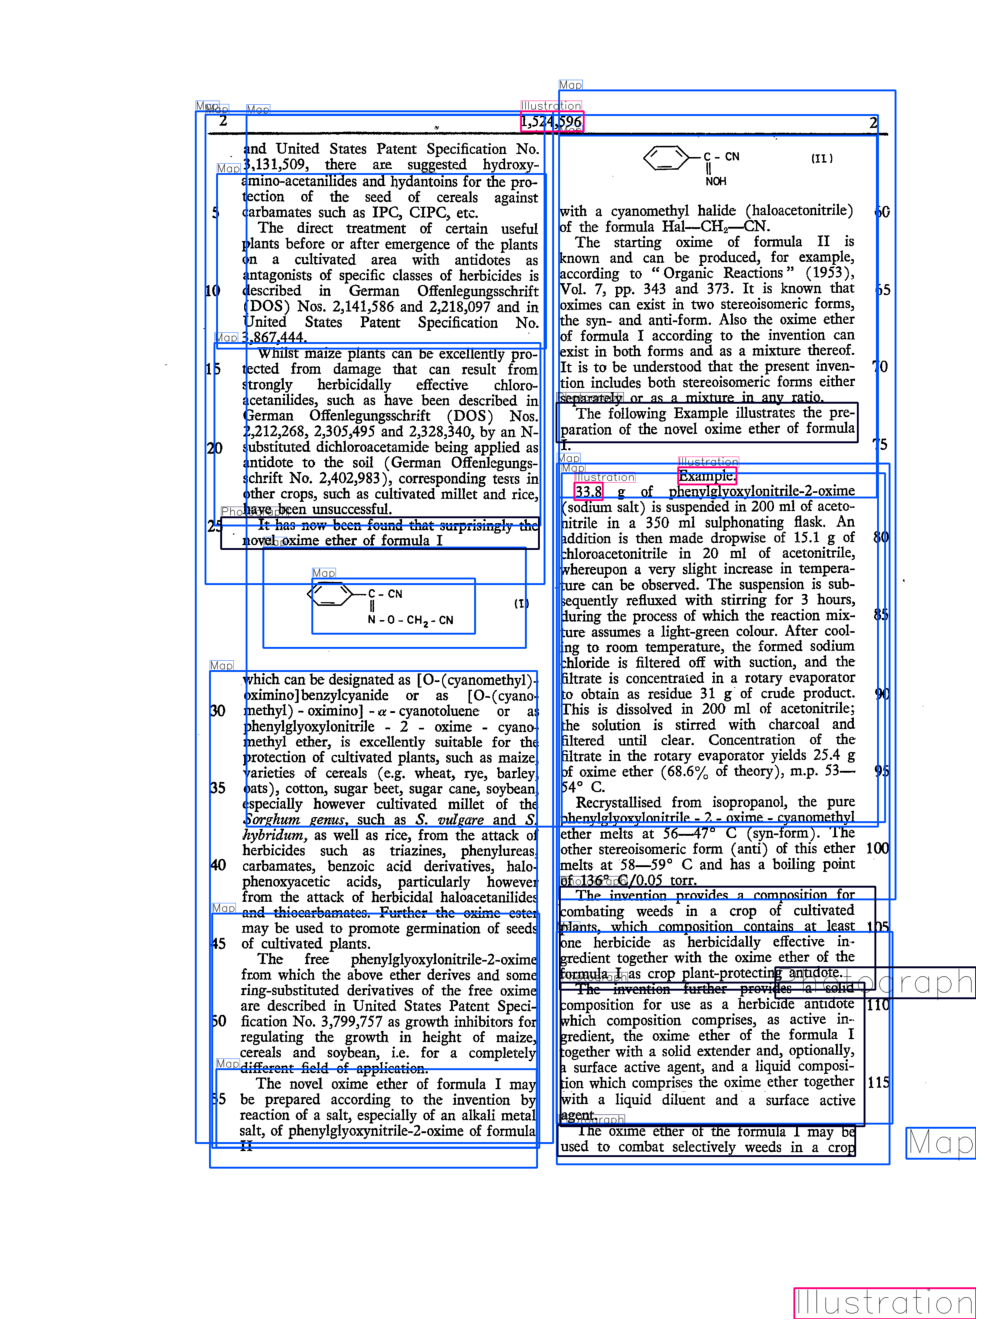

In [18]:
df = pipe.analyze(path="data/b.pdf")
df.reset_state()

df_iter = iter(df)
dp = next(df_iter)
dp = next(df_iter)
image = dp.viz()

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [6]:
import camelot
#tables = camelot.read_pdf('data/table.pdf',pages="1") #lattice, stream, stream, json, text,
tables = camelot.read_pdf('data/a.pdf',pages="1")

df = tables[0].df

#tables[0].to_csv('c.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
 # get a pandas DataFrame!
camelot.plot(tables[0], kind='text').show()
camelot.plot(tables[0], kind='grid').show()
camelot.plot(tables[0], kind='joint').show()
df.head(10)

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\camelot\parsers\lattice.py:411: UserWarning: page-1 is image-based, camelot only works on text-based pages.
  warnings.warn(


IndexError: list index out of range

In [28]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header

In [29]:
df.head()

,Speed (mph),Driver,Car,Engine\nDate,
1,407.447,Craig Breedlove,Spirit of America,GE J47\n8/5/63,
2,413.199,Tom Green,Wingfoot Express,WE J46 \n10/2/64,
3,434.22,Art Arfons,Green Monster,GE J79 \n10/5/64,
4,468.719,Craig Breedlove,Spirit of America,GE J79 \n10/13/64,
5,526.277,Craig Breedlove,Spirit of America,GE J79 \n10/15/65,


In [30]:
df[['Engine', 'Date']] = df['Engine\nDate'].str.split("\n", n=1, expand=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_28936\3968258336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Engine', 'Date']] = df['Engine\nDate'].str.split("\n", n=1, expand=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_28936\3968258336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Engine', 'Date']] = df['Engine\nDate'].str.split("\n", n=1, expand=True)


In [31]:
df.head()

,Speed (mph),Driver,Car,Engine\nDate,,Engine,Date
1,407.447,Craig Breedlove,Spirit of America,GE J47\n8/5/63,,GE J47,8/5/63
2,413.199,Tom Green,Wingfoot Express,WE J46 \n10/2/64,,WE J46,10/2/64
3,434.22,Art Arfons,Green Monster,GE J79 \n10/5/64,,GE J79,10/5/64
4,468.719,Craig Breedlove,Spirit of America,GE J79 \n10/13/64,,GE J79,10/13/64
5,526.277,Craig Breedlove,Spirit of America,GE J79 \n10/15/65,,GE J79,10/15/65


In [54]:
tables = camelot.read_pdf('data/d.pdf',pages='0,1') #lattice, stream, stream, json, text,


df = tables[0].df

#tables[0].to_csv('c.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
 # get a pandas DataFrame!
camelot.plot(tables[0], kind='text').show()
df.head()

2024-09-22T17:17:15 - INFO - Processing page-0
[0922 17:17.15 @lattice.py:407]  INF  Processing page-0
c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\camelot\parsers\lattice.py:411: UserWarning: page-0 is image-based, camelot only works on text-based pages.
  warnings.warn(
2024-09-22T17:17:15 - INFO - Processing page-1
[0922 17:17.15 @lattice.py:407]  INF  Processing page-1


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\camelot\parsers\lattice.py:411: UserWarning: page-1 is image-based, camelot only works on text-based pages.
  warnings.warn(


IndexError: list index out of range

In [3]:
import ctypes
from ctypes.util import find_library
find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

In [5]:
%pip install Ghostscript

Note: you may need to restart the kernel to use updated packages.


^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install decimer-segmentation

  Using cached decimer_segmentation-1.4.0-py3-none-any.whl.metadata (8.1 kB)
INFO: pip is looking at multiple versions of decimer-segmentation to determine which version is compatible with other requirements. This could take a while.
  Using cached decimer_segmentation-1.3.0-py3-none-any.whl.metadata (8.1 kB)
  Using cached decimer_segmentation-1.2.5-py3-none-any.whl.metadata (8.1 kB)
  Using cached decimer_segmentation-1.2.4-py3-none-any.whl.metadata (8.1 kB)
  Using cached decimer_segmentation-1.2.3-py3-none-any.whl.metadata (8.1 kB)
  Using cached decimer_segmentation-1.2.1-py3-none-any.whl.metadata (8.1 kB)
  Using cached decimer_segmentation-1.1.3-py3-none-any.whl.metadata (8.1 kB)
  Using cached imantics-0.1.12.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached decimer_segmentation-1.1.2-py3-none-any.whl.metadata (7.7 kB)
INFO: pip is still looking at multiple versions of decimer-segmentation to dete

ERROR: Cannot install decimer-segmentation==1.1, decimer-segmentation==1.1.1, decimer-segmentation==1.1.2, decimer-segmentation==1.1.3, decimer-segmentation==1.2.1, decimer-segmentation==1.2.3, decimer-segmentation==1.2.4, decimer-segmentation==1.2.5, decimer-segmentation==1.3.0 and decimer-segmentation==1.4.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [1]:
from decimer_segmentation import segment_chemical_structures, segment_chemical_structures_from_file
import cv2

# Segment structures in scanned page image (np.array)
page = cv2.imread("data/b.pdf")
segments = segment_chemical_structures(page, expand=True)

# Segment structures from file (pdf or image)
# Windows users may need to specify the location of their poppler installation with the poppler_path argument if they want to process pdf files
segments = segment_chemical_structures_from_file(path, expand=True, poppler_path=None)


ModuleNotFoundError: No module named 'decimer_segmentation'